# DELHI AIR QUALITY INDEX-- ANALYSIS

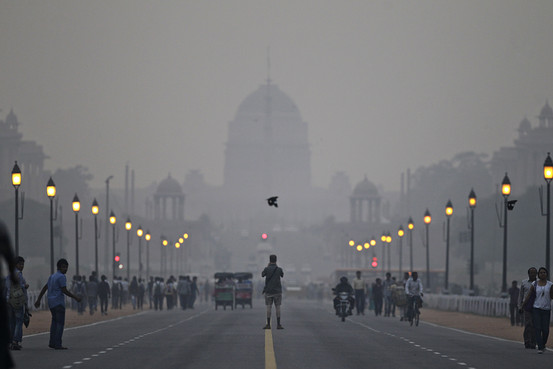

## Importing the libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Reading the data as a Pandas DataFrame

In [3]:
air = pd.read_csv("delhi_air_polution.csv")

## Display the first 5 rows

In [4]:
air.head()

,date,co,no,no2,o3,so2,pm2_5,pm10,nh3
0,2020-11-25 01:00:00,2616.88,2.18,70.60,13.59,38.62,364.61,411.73,28.63
1,2020-11-25 02:00:00,3631.59,23.25,89.11,0.33,54.36,420.96,486.21,41.04
2,2020-11-25 03:00:00,4539.49,52.75,100.08,1.11,68.67,463.68,541.95,49.14
3,2020-11-25 04:00:00,4539.49,50.96,111.04,6.44,78.20,454.81,534.00,48.13
4,2020-11-25 05:00:00,4379.27,42.92,117.90,17.17,87.74,448.14,529.19,46.61


## Cheaking the number of rows and columns 

In [5]:
air.shape

(18776, 9)

## Cheaking the duplicate values 

In [6]:
air.duplicated().sum()

0

There is no duplicate value in the dataset

## Displays a concise summary of the dataframe 

In [7]:
air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18776 entries, 0 to 18775
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    18776 non-null  object 
 1   co      18776 non-null  float64
 2   no      18776 non-null  float64
 3   no2     18776 non-null  float64
 4   o3      18776 non-null  float64
 5   so2     18776 non-null  float64
 6   pm2_5   18776 non-null  float64
 7   pm10    18776 non-null  float64
 8   nh3     18776 non-null  float64
dtypes: float64(8), object(1)
memory usage: 1.3+ MB


## Cheaking the missing values of the dataframe 

In [8]:
air.isna().sum().to_frame().rename(columns={0:"Missing Values"})

,Missing Values
date,0
co,0
no,0
no2,0
o3,0
so2,0
pm2_5,0
pm10,0
nh3,0


There is no missing values in the dataset

## Describing the dataframe 

In [9]:
air.describe()

,co,no,no2,o3,so2,pm2_5,pm10,nh3
count,18776.000000,18776.000000,18776.000000,18776.000000,18776.000000,18776.000000,18776.000000,18776.000000
mean,2929.228628,33.660702,66.221299,60.346239,66.693633,238.130309,300.092966,25.109815
std,2854.523506,62.127118,48.527492,80.464932,49.439191,226.533625,267.165827,26.402108
min,260.350000,0.000000,4.280000,0.000000,5.250000,11.830000,15.070000,0.000000
25%,1068.120000,0.680000,33.930000,0.340000,34.810000,84.440000,118.797500,9.630000
50%,1842.500000,5.250000,54.150000,27.180000,52.930000,157.445000,209.705000,17.480000
75%,3685.000000,35.760000,83.630000,92.980000,82.020000,313.000000,387.965000,30.400000
max,21148.680000,500.680000,460.620000,801.090000,579.830000,1708.090000,1969.930000,287.770000


## Cheaking the outliers 

WHAT IS AN OUTLIER?

Outlier is an observation that is numerically distant from the rest of the data or in a simple word it is the value which is out of the range. Outlier is a commonly used terminology by analysts and data scientists as it needs close attention else it can result in wildly wrong estimations. Simply speaking, Outlier is an observation that appears far away and diverges from an overall pattern in a sample.


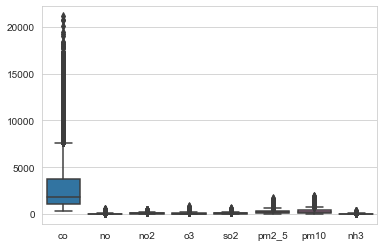

In [10]:
import seaborn as sns
sns.set_style("whitegrid")
sns.boxplot(data=air)
plt.show()

There are so many outliers in each variable. It can affect our assumptions and results.

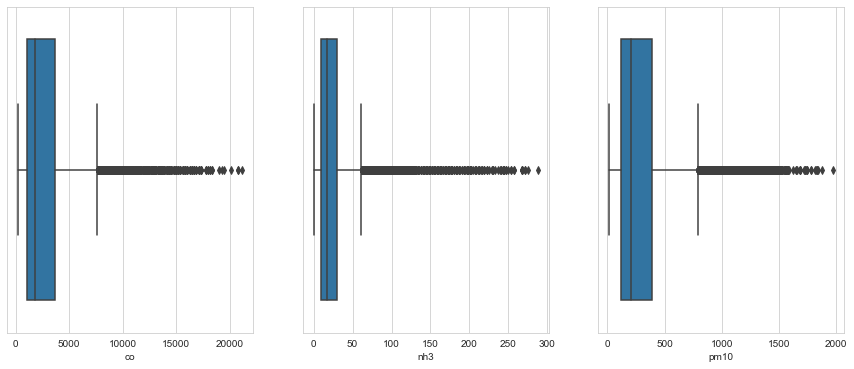

In [11]:
plt.figure(figsize=(15,6))
sns.set_style("whitegrid")
plt.subplot(131)
sns.boxplot(data=air, x='co')

plt.subplot(132)
sns.boxplot(data=air, x='nh3')

plt.subplot(133)
sns.boxplot(data=air, x='pm10')
plt.show()

## Removing the outliers 

In [12]:
air = air.drop(air[air['co'] > 5500].index)
air = air.drop(air[air['no'] > 40].index)
air = air.drop(air[air['no2'] > 160].index)
air = air.drop(air[air['o3'] > 300].index)
air = air.drop(air[air['so2'] > 140].index)
air = air.drop(air[air['pm2_5'] > 750].index)
air = air.drop(air[air['pm10'] > 800].index)
air = air.drop(air[air['nh3'] > 70].index)

In [13]:
air

,date,co,no,no2,o3,so2,pm2_5,pm10,nh3
0,2020-11-25 01:00:00,2616.88,2.18,70.60,13.59,38.62,364.61,411.73,28.63
1,2020-11-25 02:00:00,3631.59,23.25,89.11,0.33,54.36,420.96,486.21,41.04
5,2020-11-25 06:00:00,3898.62,28.39,117.90,40.05,101.09,437.25,511.79,42.05
10,2020-11-25 11:00:00,2136.23,1.27,94.59,86.55,103.95,284.51,324.34,21.28
11,2020-11-25 12:00:00,2590.18,0.19,109.67,50.78,82.02,287.83,336.00,27.87
...,...,...,...,...,...,...,...,...,...
18771,2023-01-24 04:00:00,1762.39,4.64,37.01,33.26,30.52,231.15,289.84,6.27
18772,2023-01-24 05:00:00,1735.69,6.82,34.96,46.49,34.33,225.08,280.52,9.12
18773,2023-01-24 06:00:00,1922.61,8.16,40.10,56.51,43.39,242.49,296.07,12.54
18774,2023-01-24 07:00:00,1361.85,9.05,52.78,71.53,100.14,165.67,191.82,7.47


Here we deleated the rows containing outliers

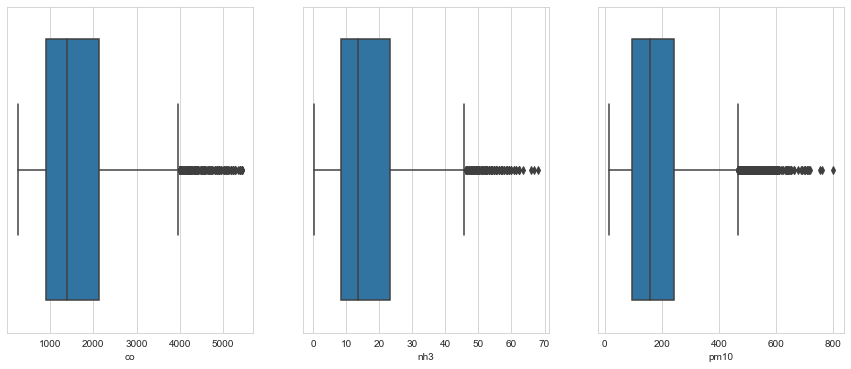

In [14]:
plt.figure(figsize=(15,6))
sns.set_style("whitegrid")
plt.subplot(131)
sns.boxplot(data=air, x='co')

plt.subplot(132)
sns.boxplot(data=air, x='nh3')

plt.subplot(133)
sns.boxplot(data=air, x='pm10')
plt.show()

Now we can see the number of outliers are reduced. Now we can use our data

## Fetching only the columns with categorical values.

In [15]:
category_cols =air.select_dtypes(["object"]).head()
category_cols 

,date
0,2020-11-25 01:00:00
1,2020-11-25 02:00:00
5,2020-11-25 06:00:00
10,2020-11-25 11:00:00
11,2020-11-25 12:00:00


Here 'date' is the only onject type variable

## Converting categorical value to datetime64 

In [16]:
air.date

0        2020-11-25 01:00:00
1        2020-11-25 02:00:00
5        2020-11-25 06:00:00
10       2020-11-25 11:00:00
11       2020-11-25 12:00:00
                ...         
18771    2023-01-24 04:00:00
18772    2023-01-24 05:00:00
18773    2023-01-24 06:00:00
18774    2023-01-24 07:00:00
18775    2023-01-24 08:00:00
Name: date, Length: 13330, dtype: object

The data type of date is currently object, so Pandas does not know that this column is a date. We can convert it into a datetime column using the pd.to_datetime method.

In [17]:
air['date'] = pd.to_datetime(air.date)

In [18]:
air['date']

0       2020-11-25 01:00:00
1       2020-11-25 02:00:00
5       2020-11-25 06:00:00
10      2020-11-25 11:00:00
11      2020-11-25 12:00:00
                ...        
18771   2023-01-24 04:00:00
18772   2023-01-24 05:00:00
18773   2023-01-24 06:00:00
18774   2023-01-24 07:00:00
18775   2023-01-24 08:00:00
Name: date, Length: 13330, dtype: datetime64[ns]

## Extracting different parts of the data into separate columns 

WE can see that it now has the datatype datetime64. We can now extract different parts of the data into separate columns.

In [19]:
air['year'] = air['date'].dt.year
air['month'] = air['date'].dt.month
air['day'] = air['date'].dt.day
air['weekday']=air['date'].dt.day_name()
air['hour'] = air['date'].dt.hour

In [20]:
seasons = { 1:'Winter', 2:'Winter', 3:'Spring', 4:'Summer', 5:'Summer',
            6:'Summer', 7:'Monsoon', 8:'Monsoon',9:'Monsoon', 10:'Autumn', 11:'Autumn',12:'Winter',}
air['seasons']=air['month'].map(seasons)

In [21]:
air

,date,co,no,no2,o3,so2,pm2_5,pm10,nh3,year,month,day,weekday,hour,seasons
0,2020-11-25 01:00:00,2616.88,2.18,70.60,13.59,38.62,364.61,411.73,28.63,2020,11,25,Wednesday,1,Autumn
1,2020-11-25 02:00:00,3631.59,23.25,89.11,0.33,54.36,420.96,486.21,41.04,2020,11,25,Wednesday,2,Autumn
5,2020-11-25 06:00:00,3898.62,28.39,117.90,40.05,101.09,437.25,511.79,42.05,2020,11,25,Wednesday,6,Autumn
10,2020-11-25 11:00:00,2136.23,1.27,94.59,86.55,103.95,284.51,324.34,21.28,2020,11,25,Wednesday,11,Autumn
11,2020-11-25 12:00:00,2590.18,0.19,109.67,50.78,82.02,287.83,336.00,27.87,2020,11,25,Wednesday,12,Autumn
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18771,2023-01-24 04:00:00,1762.39,4.64,37.01,33.26,30.52,231.15,289.84,6.27,2023,1,24,Tuesday,4,Winter
18772,2023-01-24 05:00:00,1735.69,6.82,34.96,46.49,34.33,225.08,280.52,9.12,2023,1,24,Tuesday,5,Winter
18773,2023-01-24 06:00:00,1922.61,8.16,40.10,56.51,43.39,242.49,296.07,12.54,2023,1,24,Tuesday,6,Winter
18774,2023-01-24 07:00:00,1361.85,9.05,52.78,71.53,100.14,165.67,191.82,7.47,2023,1,24,Tuesday,7,Winter


## Heatmap 

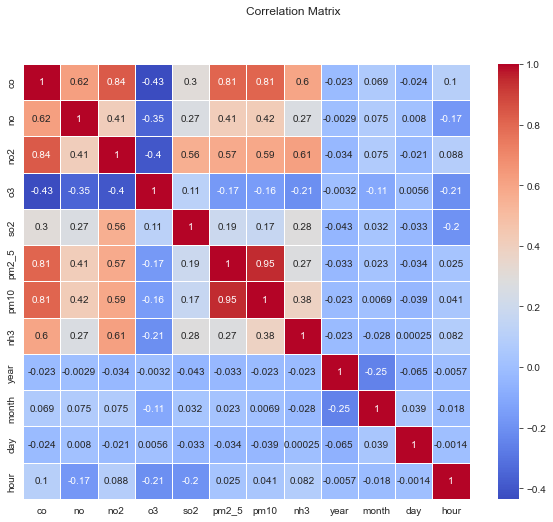

In [21]:
plt.figure(figsize=(10,8))
sns.set_style('white')
sns.heatmap(data=air.corr(),
           annot=True,
           linewidth=0.5,
           cmap="coolwarm")
plt.suptitle("Correlation Matrix")
plt.show()

## Pairplot 

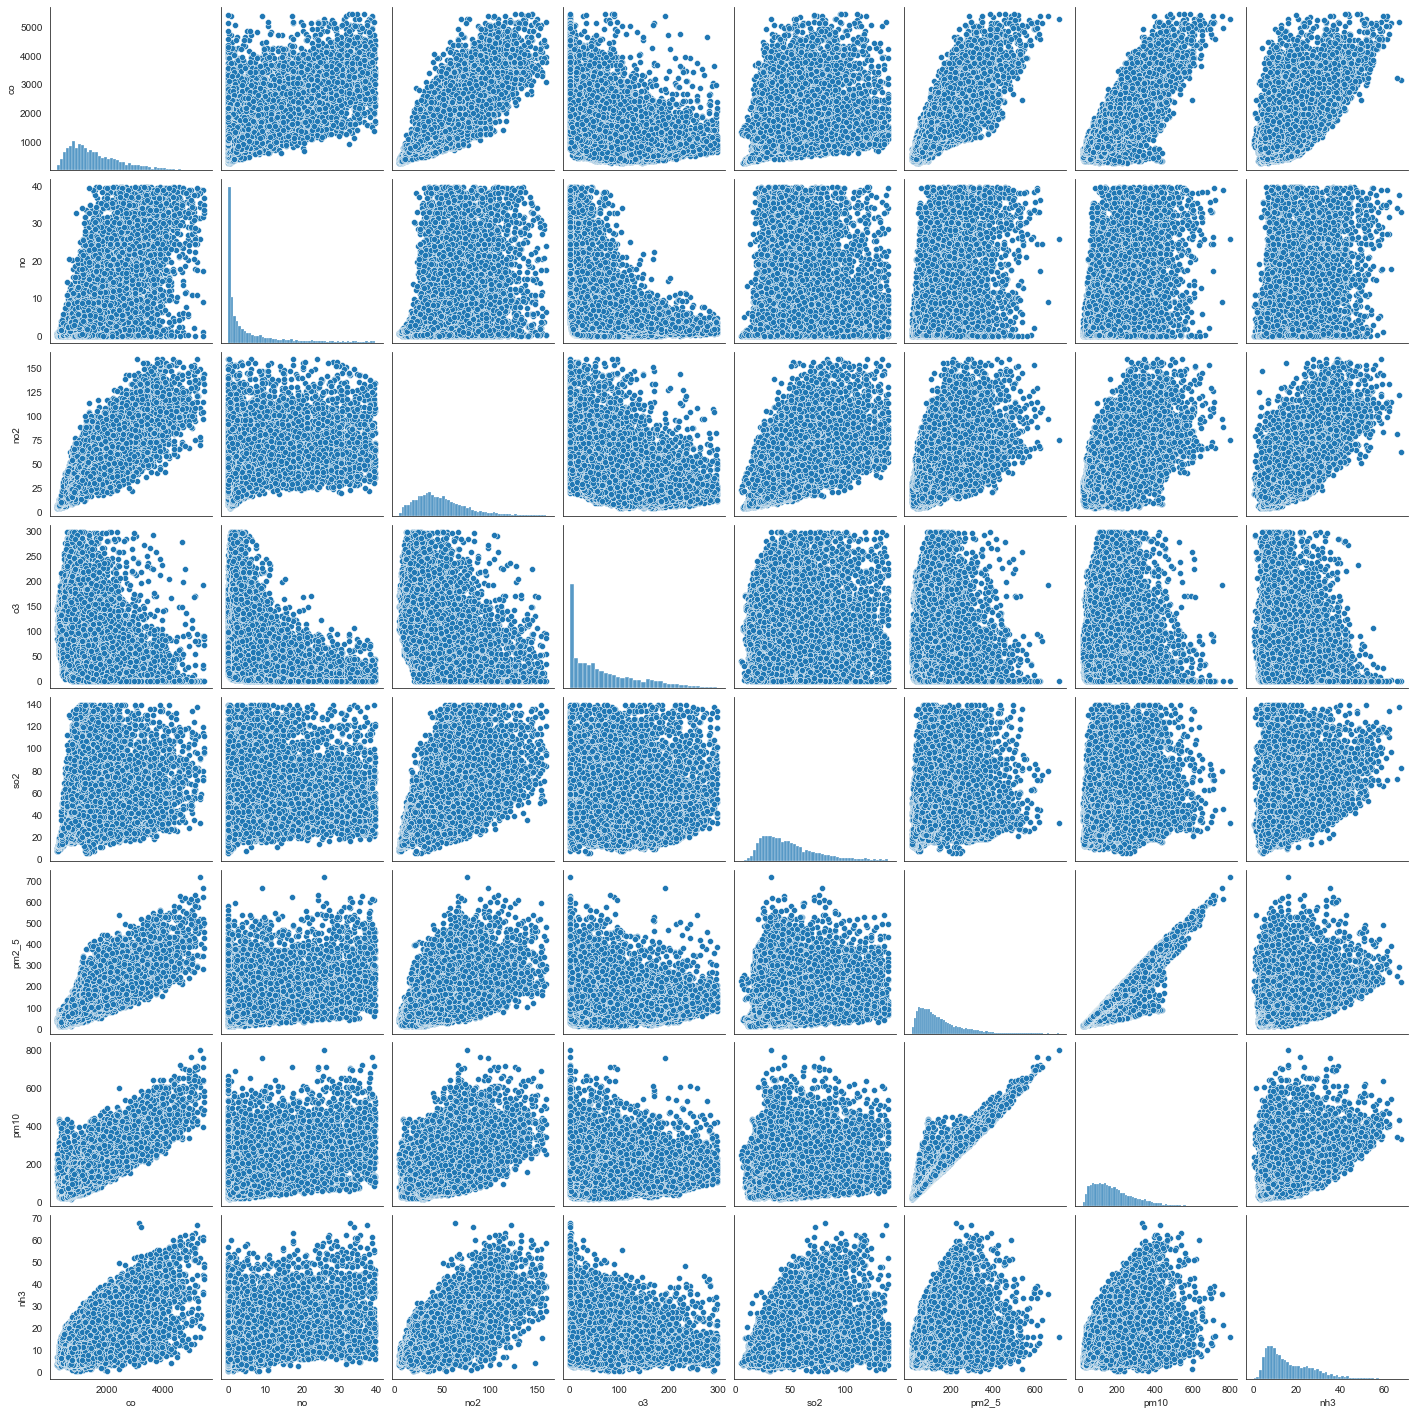

In [22]:
sns.pairplot(air[['co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3']])

##  Cheaking the correlation

In [23]:
plt.figure(figsize=(7,5))
air.corr().style.background_gradient(cmap="coolwarm")

,co,no,no2,o3,so2,pm2_5,pm10,nh3,year,month,day,hour
co,1.000000,0.620280,0.835705,-0.434738,0.300458,0.807274,0.807465,0.599041,-0.023227,0.068697,-0.024247,0.102756
no,0.620280,1.000000,0.411237,-0.353924,0.265155,0.414438,0.422672,0.265058,-0.002946,0.075076,0.008036,-0.171553
no2,0.835705,0.411237,1.000000,-0.398622,0.561159,0.574998,0.585511,0.614849,-0.033970,0.074958,-0.020987,0.088153
o3,-0.434738,-0.353924,-0.398622,1.000000,0.114869,-0.165976,-0.158784,-0.205570,-0.003183,-0.107670,0.005599,-0.208174
so2,0.300458,0.265155,0.561159,0.114869,1.000000,0.189698,0.169995,0.284974,-0.042713,0.032189,-0.032553,-0.196162
pm2_5,0.807274,0.414438,0.574998,-0.165976,0.189698,1.000000,0.946562,0.273194,-0.032852,0.023456,-0.034310,0.025049
pm10,0.807465,0.422672,0.585511,-0.158784,0.169995,0.946562,1.000000,0.378149,-0.022957,0.006932,-0.038950,0.040854
nh3,0.599041,0.265058,0.614849,-0.205570,0.284974,0.273194,0.378149,1.000000,-0.023171,-0.028361,0.000249,0.081983
year,-0.023227,-0.002946,-0.033970,-0.003183,-0.042713,-0.032852,-0.022957,-0.023171,1.000000,-0.252300,-0.065317,-0.005703
month,0.068697,0.075076,0.074958,-0.107670,0.032189,0.023456,0.006932,-0.028361,-0.252300,1.000000,0.038637,-0.018178


<Figure size 504x360 with 0 Axes>

## Data visualization 

### 1)carbon monoxide (CO) effect on air quality

Carbon monoxide (CO) is a colorless, odorless gas. It results from the incomplete combustion of carbon-containing fuels such as natural gas, gasoline, or wood, and is emitted by a wide variety of combustion sources, including motor vehicles, power plants, wildfires, and incinerators. 
CO can cause dizziness, confusion, unconsciousness and death.

###  carbon monoxide during weekdays of different seasons

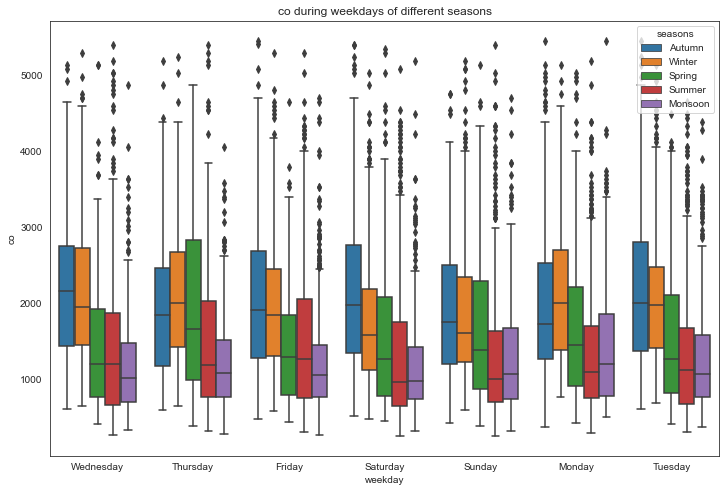

In [24]:
fig, ax= plt.subplots(figsize=(12,8))
sns.boxplot(data=air,x='weekday',y='co', hue='seasons')
plt.title("co during weekdays of different seasons")
plt.show()

Here we can see during autumn, winter and spring season the CO is very large in air because the cold air is denser and moves slower than warm air, which affects co.

### CO during different hours  

<AxesSubplot:xlabel='hour', ylabel='co'>

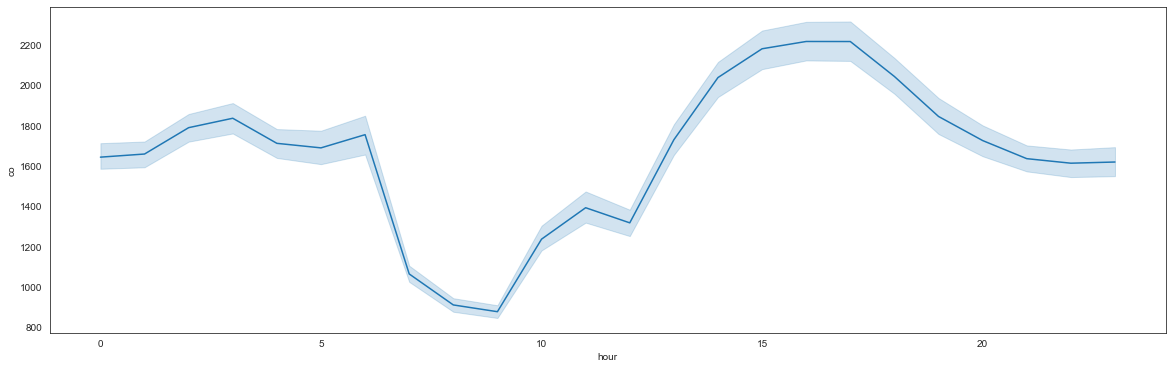

In [25]:
plt.figure(figsize=(20, 6))

sns.lineplot(data=air, x="hour", y="co")

In morning the CO shows less as time goes from afternoon to night the CO goes on incresing due to heavy traffic and fatory hours.

### 2) nitrogen oxide (no) effect on air quality

Nitrogen oxides are critical components of photochemical smog. They produce the yellowish-brown colour of the smog. In poorly ventilated situations, indoor domestic appliances such as gas stoves and gas or wood heaters can be significant sources of nitrogen oxides. Smog is air pollution that reduces visibility 

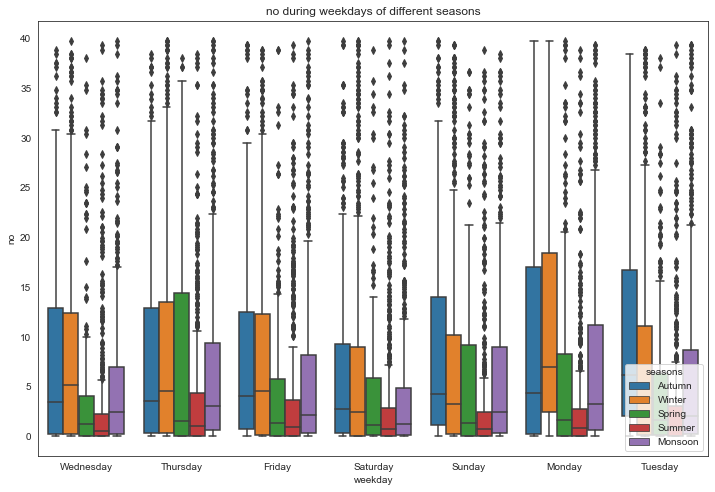

In [26]:
fig, ax= plt.subplots(figsize=(12,8))
sns.boxplot(data=air,x='weekday',y='no',hue='seasons')
plt.title("no during weekdays of different seasons")
plt.show()

Here we can see during autumn and winter season the no is very large in air because the cold air is denser and moves slower than warm air, which affects no. It also shows that during weekend NO is less as compared to weekdays because higher levels of NO occures due to heavy traffic congestion in delhi.

###  NO during different hours  

<AxesSubplot:xlabel='hour', ylabel='no'>

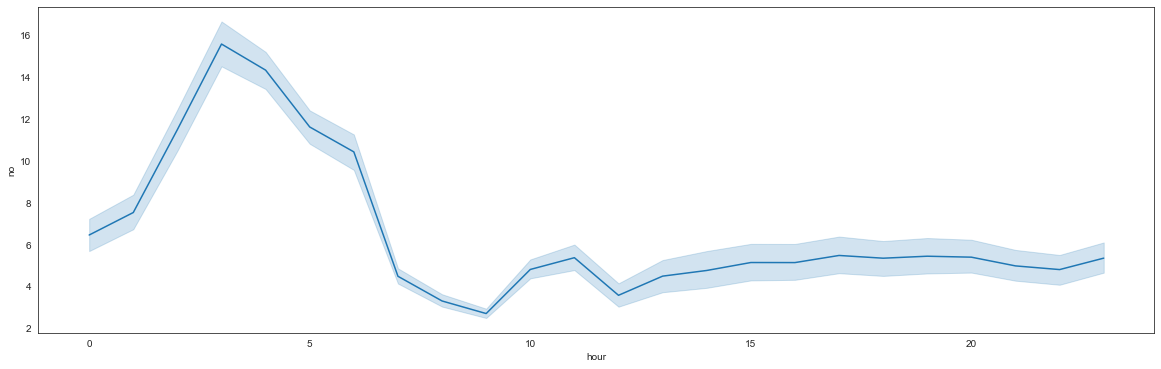

In [27]:
plt.figure(figsize=(20, 6))

sns.lineplot(data=air, x="hour", y="no")

In morning the NO shows less as time goes from afternoon to night the CO goes on incresing due to heavy traffic and fatory hours.

## 3) Ozone (O3) effect on air quality
 

 Ground-level ozone comes from pollution emitted from cars, power plants, and chemical plants. It reduces overall productivity of plants and damaged the cells.

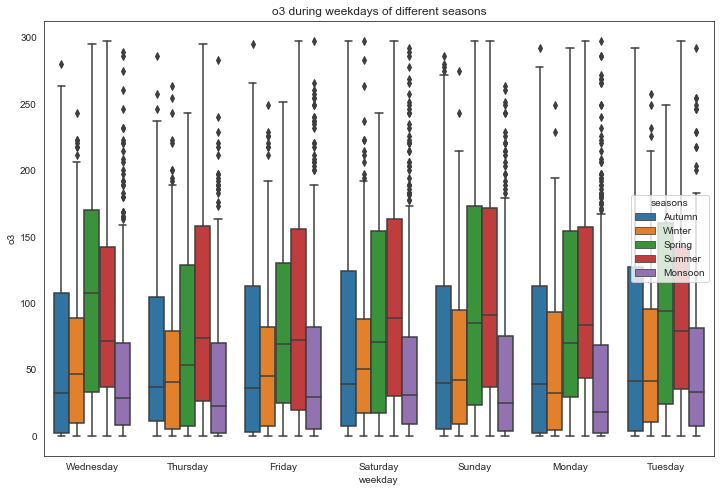

In [28]:
plt.figure(figsize=(12,8))
sns.boxplot(data=air,x='weekday',y='o3',hue='seasons')
plt.title("o3 during weekdays of different seasons")
plt.show()

Here we can see that O3 is very high in spring and summer because temp in delhi during summer is rises high so that as the weather heats up during the summer months, ground-level ozone pollution increases as pollutants react to heat and sunlight.

### O3 during different hours 

<AxesSubplot:xlabel='hour', ylabel='o3'>

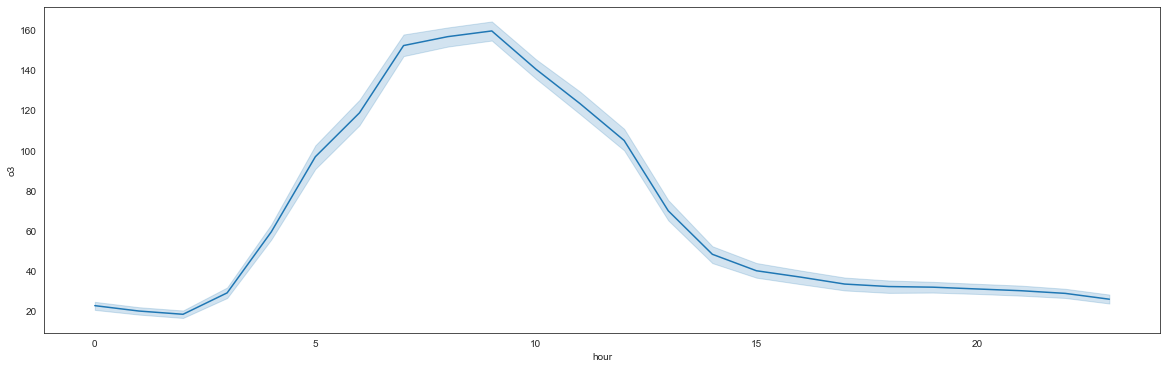

In [29]:
plt.figure(figsize=(20, 6))

sns.lineplot(data=air, x="hour", y="o3")

In morning O3 is very high for the heat of the sun.

##  Nitro dioxide(NO2), Sulfur dioxide(SO2), Ammonia(NH3) effect on air quality 

*Nitrogen dioxide is toxic to plants in short-term concentrations of 120 µg/m3. It reduces plant growth. When sulphur dioxide and ozone are also present, the effects on vegetation are worse. Along with sulphur dioxide, nitrogen dioxide can cause acid rain. 

*Sulfur dioxide can create secondary pollutants, such as sulfate aerosols, particulate matter, and acid rain, once released into the air.

*Ammonia is a colourless gas with a pungent odor that is noticeable at concentrations above 50 ppm. Most of the NH3 emitted is generated from livestock waste management and fertilizer production.Ammonia emissions can lead to increased acid depositions and excessive levels of nutrients in soil, rivers or lakes, which can have negative impacts on aquatic ecosystems and cause damage to forests, crops and other vegetation

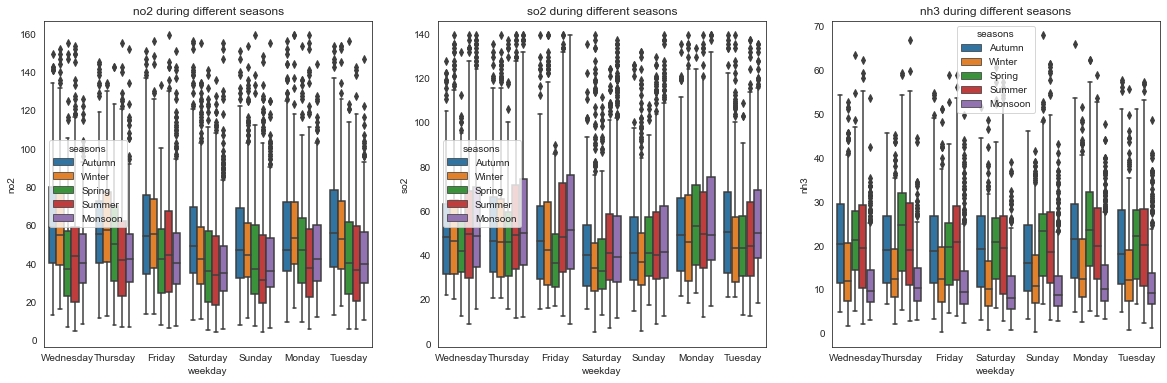

In [30]:
plt.figure(figsize=(20, 6))

plt.subplot(131)
sns.boxplot(data=air, x="weekday", y="no2", hue="seasons")
plt.title("no2 during different seasons")

plt.subplot(132)
sns.boxplot(data=air, x="weekday", y="so2", hue="seasons")
plt.title("so2 during different seasons")

plt.subplot(133)
sns.boxplot(data=air, x="weekday", y="nh3", hue="seasons")
plt.title("nh3 during different seasons")

plt.show()

*The highest amount of NO2 is found during autumn 

*The highest amount of SO2 is found during monsoon 

*The highest amount of NH3 is found during autumn and summer and spring



### In different hours 

Text(0.5, 1.0, 'nh3 in different hours')

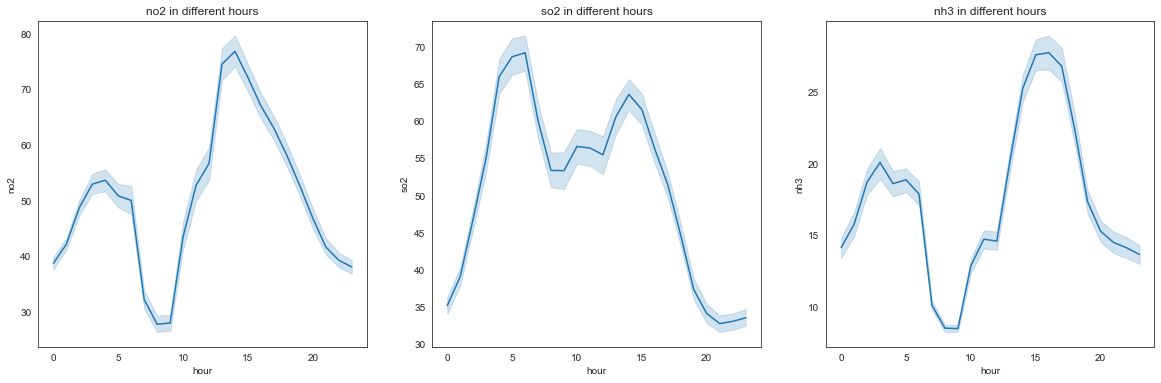

In [31]:
plt.figure(figsize=(20, 6))

plt.subplot(131)
sns.lineplot(data=air, x="hour", y="no2")
plt.title("no2 in different hours")

plt.subplot(132)
sns.lineplot(data=air, x="hour", y="so2")
plt.title("so2 in different hours")

plt.subplot(133)
sns.lineplot(data=air, x="hour", y="nh3")
plt.title("nh3 in different hours")

In morning the NO2, SO2, Nh3 shows less as time goes from afternoon to night they goes on incresing due to heavy traffic and fatory hours.

## PM2_5  effect on air quality 

Fine particulate matter (PM2.5) is an air pollutant that is a concern for people's health when levels in air are high. PM2.5 are tiny particles in the air that reduce visibility and cause the air to appear hazy when levels are elevated. Fine particles primarily come from car, truck, bus and off-road vehicle (e.g., construction equipment, snowmobile, locomotive) exhausts, other operations that involve the burning of fuels such as wood, heating oil or coal and natural sources such as forest and grass fires. 

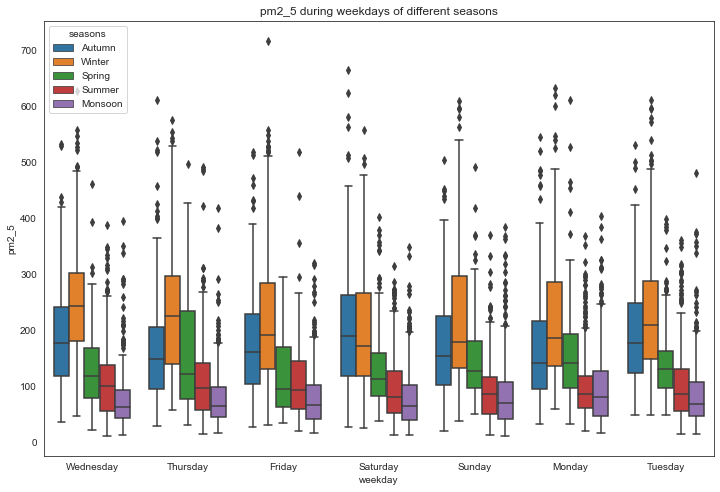

In [32]:
plt.figure(figsize=(12,8))
sns.boxplot(data=air,x='weekday',y='pm2_5' ,hue='seasons')
plt.title("pm2_5 during weekdays of different seasons")
plt.show()

Fine particulate matter (PM2.5) is very high in winter and autumn season in delhi 

###  In different hours 

<AxesSubplot:xlabel='hour', ylabel='pm2_5'>

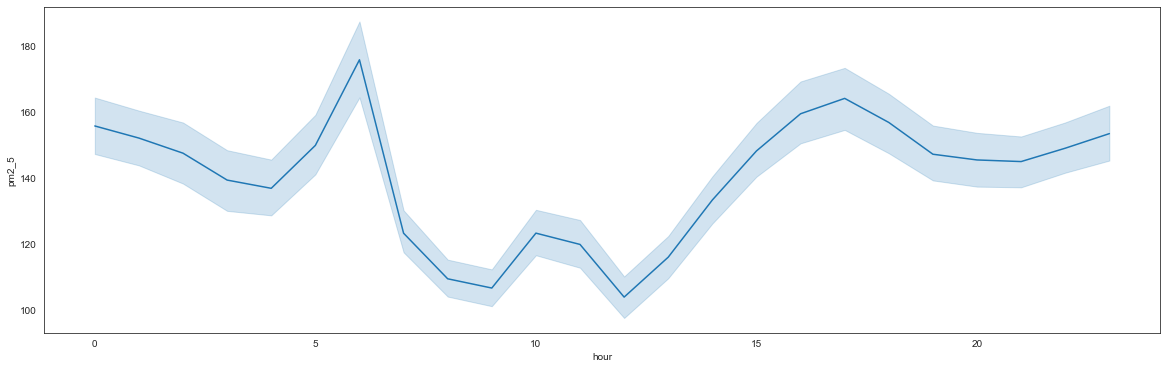

In [33]:
plt.figure(figsize=(20, 6))
sns.lineplot(data=air, x="hour", y="pm2_5")

In morning the pm2.5 shows less as time goes from afternoon to night the pm2.5 goes on incresing due to heavy traffic and fatory hours.

## PM10 effect on air quality

PM10 refers to small particles of solid or liquid with an aerodynamic diameter smaller than 10 µm. Some examples are the dust blown off of mines, slash-and-burn agriculture, road and construction dust, wood-burning stoves, and fossil fuel power plants.

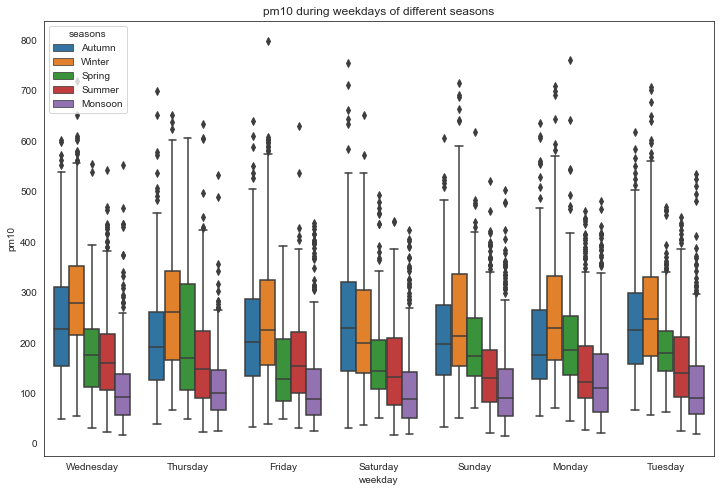

In [34]:
plt.figure(figsize=(12,8))
sns.boxplot(data=air,x='weekday',y='pm10' ,hue='seasons')
plt.title("pm10 during weekdays of different seasons")
plt.show()

Pm10 is very high in autumn and winter season in Delhi

###  In different hours 

<AxesSubplot:xlabel='hour', ylabel='pm10'>

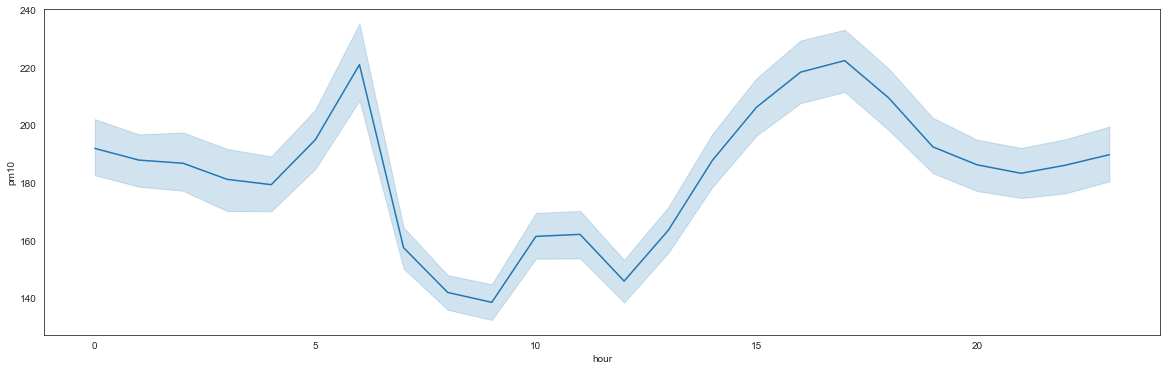

In [35]:
plt.figure(figsize=(20, 6))
sns.lineplot(data=air, x="hour", y="pm10")

In morning the pm10 shows less as time goes from afternoon to night the pm10 goes on incresing due to heavy traffic and fatory hours.

In [36]:
air.pm10.skew()

1.1103006299991085

## Comparison between the gases and pm10, pm2.5  

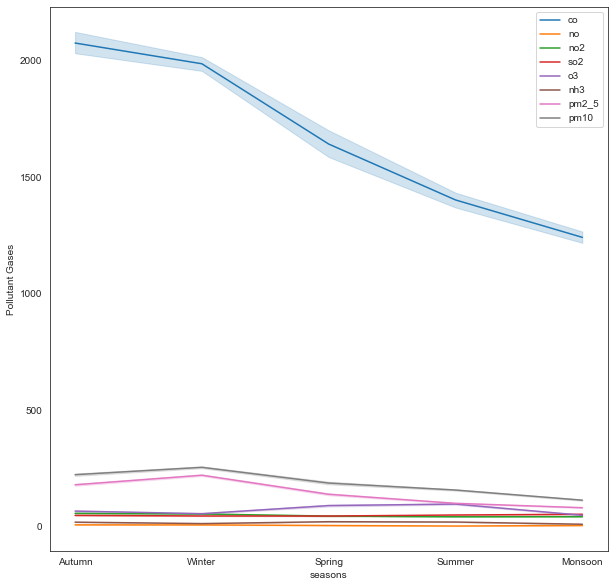

In [37]:
plt.figure(figsize=(10,10))
sns.lineplot(data = air , x = 'seasons' , y = "co",label = "co")
sns.lineplot(data = air , x = 'seasons' , y = "no",label = "no")
sns.lineplot(data = air , x = 'seasons' , y = "no2",label = "no2")
sns.lineplot(data = air , x = 'seasons' , y = "so2",label = "so2")
sns.lineplot(data = air , x = 'seasons' , y = "o3",label = "o3")
sns.lineplot(data = air , x = 'seasons' , y = "nh3",label = "nh3")
sns.lineplot(data = air , x = 'seasons' , y = "pm2_5",label = "pm2_5")
sns.lineplot(data = air , x = 'seasons' , y = "pm10",label = "pm10")

plt.ylabel("Pollutant Gases");

Here we can see that in Delhi air the amount of co is the highest rather than any other gases or pm2.5 or pm10 

## Average variable values during season

In [38]:
air.groupby(by='seasons')['co','no','no2','o3','so2','pm2_5','pm10','nh3'].mean()

C:\Users\anwes\AppData\Local\Temp\ipykernel_14916\3281589446.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  air.groupby(by='seasons')['co','no','no2','o3','so2','pm2_5','pm10','nh3'].mean()


,co,no,no2,o3,so2,pm2_5,pm10,nh3
seasons,,,,,,,,
Autumn,2076.269248,8.660126,58.071289,67.719035,49.364054,180.640099,223.983950,20.248585
Monsoon,1242.363523,6.084221,43.664540,49.799382,54.160215,82.265927,114.584339,11.343830
Spring,1642.753658,6.006625,46.425394,91.396909,46.499043,139.843906,187.996244,22.243844
Summer,1402.909263,3.630631,43.426405,97.882541,51.030976,101.123264,158.117968,20.811182
Winter,1987.249966,8.408468,55.409207,56.768077,46.830693,221.688655,255.557756,14.142347


## Conclusion 

 From the above data visualization it is clear that 
1. In winter and autumn season AQI is severe and in monsoon, spring and summer AQI is moderate (i.e. mostly Delhi air quality is bad)
2. Mostly in the morning session air quality is good as time goes upto night the Air quality is going up to severe condition

### Data visualization on relationship and distribution of PM10

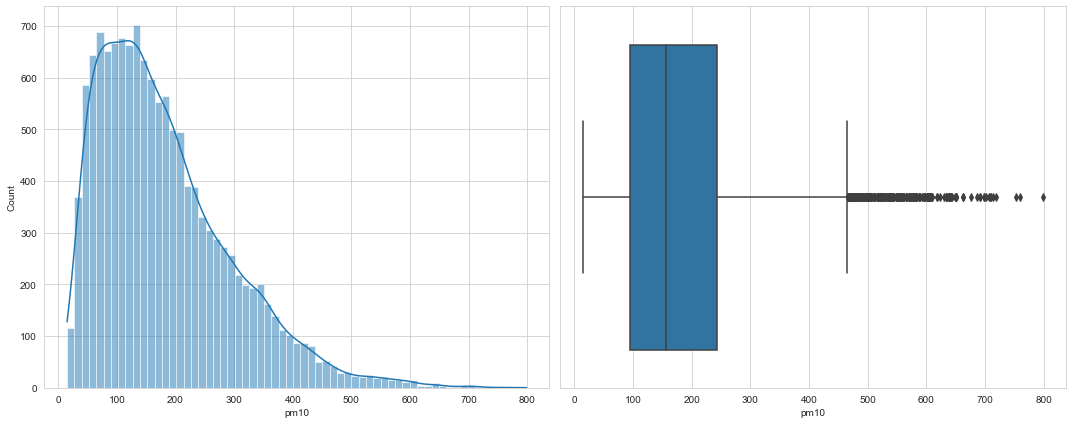

In [30]:
plt.figure(figsize=(15,6))
sns.set_style("whitegrid")
plt.subplot(121)
sns.histplot(data=air, x='pm10', kde=True)

plt.subplot(122)
sns.boxplot(data=air, x='pm10')
plt.tight_layout() # the space between the two picture is less
plt.show()

<AxesSubplot:xlabel='o3', ylabel='pm10'>

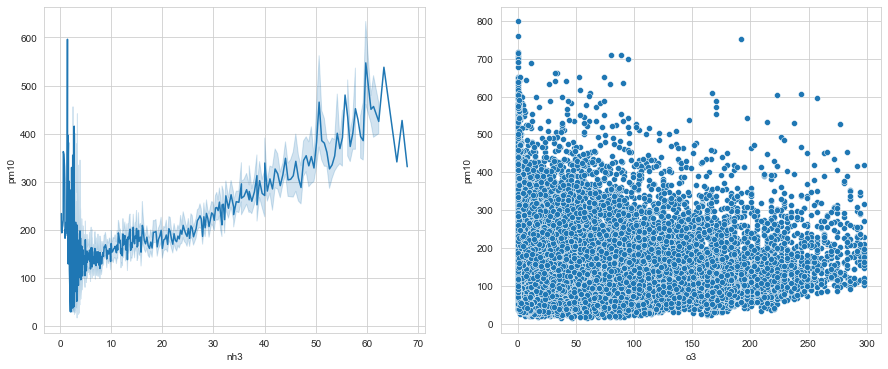

In [31]:
plt.figure(figsize=(15,6))

plt.subplot(121)
sns.lineplot(data=air, x='nh3', y='pm10')

plt.subplot(122)
sns.scatterplot(data=air, x='o3', y='pm10')

## Predicting PM10 with linear regression 

## Choose target and features 

In [32]:
x= (air.iloc[:,1:9]).drop(['pm10'], axis=1) #feature

y= air.pm10 #target

In [33]:
x

,co,no,no2,o3,so2,pm2_5,nh3
0,2616.88,2.18,70.60,13.59,38.62,364.61,28.63
1,3631.59,23.25,89.11,0.33,54.36,420.96,41.04
5,3898.62,28.39,117.90,40.05,101.09,437.25,42.05
10,2136.23,1.27,94.59,86.55,103.95,284.51,21.28
11,2590.18,0.19,109.67,50.78,82.02,287.83,27.87
...,...,...,...,...,...,...,...
18771,1762.39,4.64,37.01,33.26,30.52,231.15,6.27
18772,1735.69,6.82,34.96,46.49,34.33,225.08,9.12
18773,1922.61,8.16,40.10,56.51,43.39,242.49,12.54
18774,1361.85,9.05,52.78,71.53,100.14,165.67,7.47


In [34]:
y

0        411.73
1        486.21
5        511.79
10       324.34
11       336.00
          ...  
18771    289.84
18772    280.52
18773    296.07
18774    191.82
18775    140.26
Name: pm10, Length: 13330, dtype: float64

## Spliting the data into training data and testing data 

In [35]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.3, 
                                                   random_state=42)

In [36]:
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

x_train shape: (9331, 7)
x_test shape: (3999, 7)
y_train shape: (9331,)
y_test shape: (3999,)


## Cheaking the test and train data 

In [37]:
x_train

,co,no,no2,o3,so2,pm2_5,nh3
2901,2403.26,15.42,48.67,0.04,30.28,170.56,22.80
14149,1188.28,0.03,54.84,92.98,89.65,110.85,10.39
7353,907.90,4.08,55.52,114.44,107.77,73.69,8.87
4311,2296.45,0.00,67.17,39.70,57.70,133.72,38.51
5748,2696.99,0.75,109.67,118.73,87.74,198.45,16.72
...,...,...,...,...,...,...,...
16535,2002.72,17.43,40.78,0.02,25.99,152.81,14.44
7138,1228.33,6.37,55.52,100.14,66.76,92.17,12.79
7361,1295.09,0.85,44.55,8.14,36.24,65.32,9.88
1404,2483.37,0.02,97.33,74.39,58.17,303.98,23.56


In [38]:
x_test

,co,no,no2,o3,so2,pm2_5,nh3
17790,1281.74,4.92,30.16,127.32,51.98,127.12,17.99
13688,1976.01,3.74,59.63,294.69,93.46,207.24,14.69
2325,1068.12,0.00,26.05,66.52,27.66,102.07,22.80
4928,560.76,1.26,15.08,155.93,48.16,33.00,4.43
11174,4112.24,24.81,101.45,0.02,70.57,270.20,49.65
...,...,...,...,...,...,...,...
18297,1949.31,7.49,68.55,115.87,83.92,245.78,16.72
7732,2136.23,10.95,58.95,108.72,70.57,204.36,31.67
11237,1869.20,6.54,45.24,171.66,60.08,177.40,24.07
744,2590.18,17.43,49.35,0.07,22.41,295.63,8.61


In [39]:
y_train

2901     234.73
14149    132.51
7353      83.00
4311     194.58
5748     224.29
          ...  
16535    199.06
7138     107.08
7361      91.17
1404     341.49
10750    478.76
Name: pm10, Length: 9331, dtype: float64

In [40]:
y_test

17790    148.32
13688    237.00
2325     120.89
4928      38.42
11174    354.33
          ...  
18297    278.38
7732     275.34
11237    215.43
744      330.68
15704     33.22
Name: pm10, Length: 3999, dtype: float64

## Importing and fitting the model on training data

In [41]:
from sklearn.linear_model import LinearRegression

air_model = LinearRegression()
air_model.fit(x_train, y_train)

LinearRegression()

## Checking the slope m and the intercept c 

In [42]:
m = air_model.coef_
c = air_model.intercept_

m,c

(array([-0.00982818,  0.71843073,  0.27387943,  0.07445844, -0.36882686,
         1.07958766,  1.58904838]),
 15.800570958718197)

## Predicting the target 

### predicting on training data 

In [43]:
y_pred_train = air_model.predict(x_train)
y_pred_train

array([225.78849767, 129.20336888,  87.4367796 , ...,  89.34246327,
       367.75996879, 473.40133178])

### predicting on testing data 

In [44]:
y_pred_test = air_model.predict(x_test)
y_pred_test

array([171.13087902, 249.94682385, 153.61249849, ..., 234.90824954,
       340.96203249,  36.58923623])

## Cheaking mean squared error of our model 

### For training data 

In [45]:
from sklearn.metrics import mean_squared_error, r2_score

mean_squared_error(y_train, y_pred_train)

1112.4996771555845

### For testing data

In [46]:
from sklearn.metrics import mean_squared_error, r2_score

mean_squared_error(y_test, y_pred_test)

1028.3497235827656

## Cheaking model accuracy 

### For training data 

In [47]:
accuracy = r2_score(y_train, y_pred_train)
print("the model has an accuracy of", accuracy*100)

the model has an accuracy of 91.30181772125106


### For testing data 

In [48]:
accuracy = r2_score(y_test, y_pred_test)
print("the model has an accuracy of", accuracy*100)

the model has an accuracy of 92.13525670291953


## Cheaking r2_score

### For training data 

In [49]:
r2score_train= r2_score(y_train, y_pred_train)
r2score_train

0.9130181772125106

### For testing data 

In [50]:
r2score_test= r2_score(y_test, y_pred_test)
r2score_test

0.9213525670291953

## Visualize the actual PM10 and predicted PM10

In [51]:
air_df = pd.DataFrame({"Actual": y_test,
                       "Predicted": y_pred_test,
                       "Error": abs(y_test-y_pred_test)})

air_df.head().style.background_gradient(cmap="RdYlGn")

,Actual,Predicted,Error
17790,148.320000,171.130879,22.810879
13688,237.000000,249.946824,12.946824
2325,120.890000,153.612498,32.722498
4928,38.420000,51.838127,13.418127
11174,354.330000,365.568302,11.238302


In [52]:
air_df.Error.describe()

count    3999.000000
mean       19.621024
std        25.367816
min         0.000946
25%         6.846201
50%        13.730526
75%        22.394479
max       299.709113
Name: Error, dtype: float64

## Data visualization between the actual values and predcted values

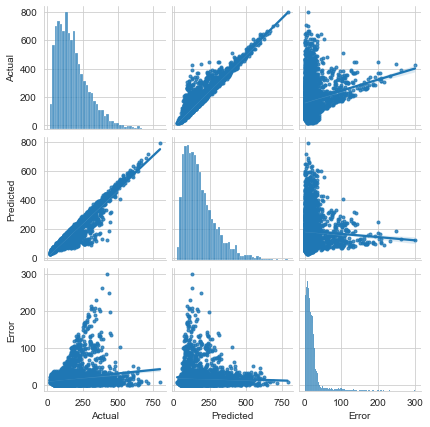

In [53]:
sns.pairplot(air_df.iloc[0:], kind="reg", height=2, markers=".")

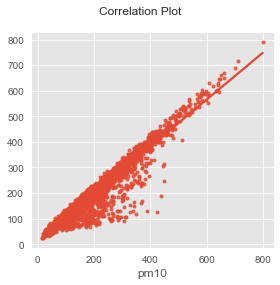

In [54]:
plt.style.use('ggplot')
plt.figure(figsize=(4, 4))
sns.regplot(x=y_test, 
            y=y_pred_test, 
            ci=None, 
            marker=".")

plt.suptitle("Correlation Plot")
plt.tight_layout()
plt.show()

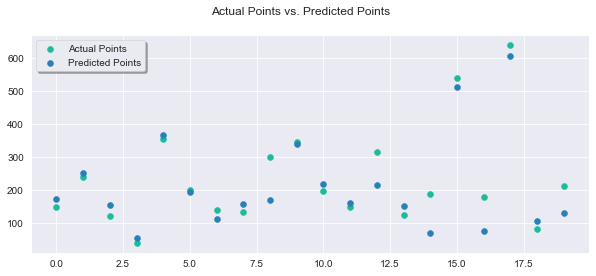

In [55]:
plt.figure(figsize=(10,4))
sns.set_style('darkgrid')

plt.scatter(x=range(20),
           y=y_test.head(20),
           color="#1abc9c",
           label="Actual Points")
plt.scatter(x=range(20),
           y=y_pred_test[:20],
           color="#2980b9",
           label="Predicted Points")

plt.suptitle("Actual Points vs. Predicted Points")
plt.legend(shadow=True,
           loc="best")
plt.show()

## Compareing "Actucal" vs "Predicted" on Testing Data using Kde

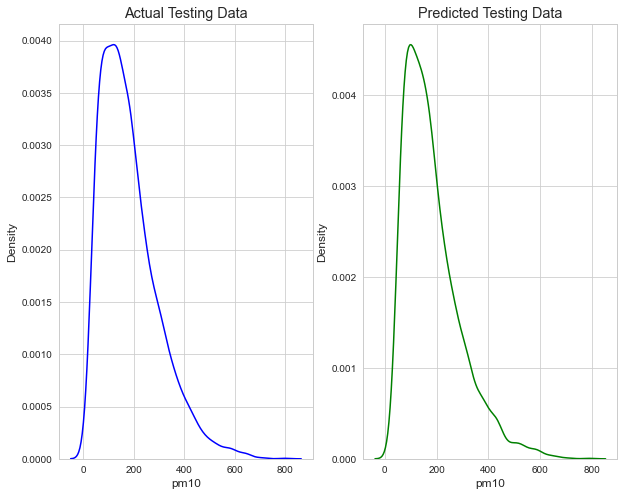

In [58]:
# Actual
plt.figure(figsize=(10,8))
plt.subplot(1, 2, 1)
sns.set_style('whitegrid')
plt.title('Actual Testing Data')
plt.xlabel('pm10')
sns.kdeplot(y_test, color='b')

# Predicted
plt.subplot(1, 2, 2)
sns.set_style('whitegrid')
plt.title('Predicted Testing Data')
plt.xlabel('pm10')
sns.kdeplot(y_pred_test, color='g')
plt.show()

plt.close()

## Compareing "Actucal" vs "Predicted" on Training Data using Kde

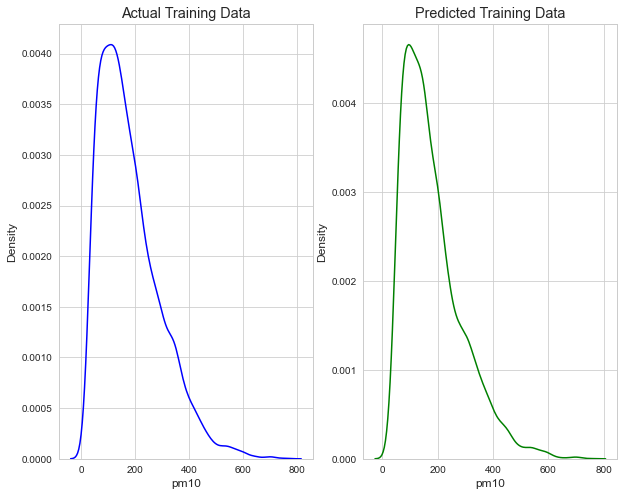

In [59]:
# Actual
plt.figure(figsize=(10,8))
plt.subplot(1, 2, 1)
sns.set_style('whitegrid')
plt.title('Actual Training Data')
plt.xlabel('pm10')
sns.kdeplot(y_train, color='b')

# Predicted
plt.subplot(1, 2, 2)
sns.set_style('whitegrid')
plt.title('Predicted Training Data')
plt.xlabel('pm10')
sns.kdeplot(y_pred_train, color='g')
plt.show()

plt.close()

In [60]:
x_test.tail()

,co,no,no2,o3,so2,pm2_5,nh3
18297,1949.31,7.49,68.55,115.87,83.92,245.78,16.72
7732,2136.23,10.95,58.95,108.72,70.57,204.36,31.67
11237,1869.20,6.54,45.24,171.66,60.08,177.40,24.07
744,2590.18,17.43,49.35,0.07,22.41,295.63,8.61
15704,781.06,6.48,36.67,33.26,72.48,27.86,5.00


In [61]:
y_test.tail()

18297    278.38
7732     275.34
11237    215.43
744      330.68
15704     33.22
Name: pm10, dtype: float64

## Let's predict on the new data 

In [62]:
features = pd.DataFrame({'co':[1949.31,2000], 
 'no':[7.49,10], 
 'no2':[68.55,56], 
 'o3':[115.87,106],
 'so2':[83.92,80],
 'pm2_5':[245.78,240],
 'nh3':[16.72,16]}, index=[0, 1])

features

,co,no,no2,o3,so2,pm2_5,nh3
0,1949.31,7.49,68.55,115.87,83.92,245.78,16.72
1,2000.00,10.00,56.00,106.00,80.00,240.00,16.00


In [63]:
air_model.predict(features)

array([290.38338337, 281.57803236])